In [ ]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')
from src.config import RAW_DATA_PATH
from src.data_ingestion import ingest_data

sns.set_style('white')

In [2]:
# ingesting the latest data
ingest_data()

# loading the ingested dataset
df = pd.read_csv(RAW_DATA_PATH)
df.head()

✅ | Dataset ingested and updated please check D:\Personal\Github\healthcare-ai-project\data\raw\chest_xray_vectorized_raw.csv


,image_index,patient_id,cardiomegaly,emphysema,effusion,no_finding,hernia,infiltration,mass,nodule,atelectasis,pneumothorax,pleural_thickening,pneumonia,fibrosis,edema,consolidation,filepath
0,00000001_000.png,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000001_000.png
1,00000001_001.png,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000001_001.png
2,00000001_002.png,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000001_002.png
3,00000002_000.png,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000002_000.png
4,00000003_000.png,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000003_000.png


In [4]:
df.shape

(111863, 18)

In [5]:
df.nunique()

image_index           111863
patient_id             30773
cardiomegaly               2
emphysema                  2
effusion                   2
no_finding                 2
hernia                     2
infiltration               2
mass                       2
nodule                     2
atelectasis                2
pneumothorax               2
pleural_thickening         2
pneumonia                  2
fibrosis                   2
edema                      2
consolidation              2
filepath              111863
dtype: int64

We have data for 111K X-rays for 30K patients with 14 diagnosible disease labels and one no findings label

In [6]:
# creating the list of disease labels
disease_list = df.columns[2:-1]

In [7]:
# checking for missing values
df.isnull().sum()

image_index           0
patient_id            0
cardiomegaly          0
emphysema             0
effusion              0
no_finding            0
hernia                0
infiltration          0
mass                  0
nodule                0
atelectasis           0
pneumothorax          0
pleural_thickening    0
pneumonia             0
fibrosis              0
edema                 0
consolidation         0
filepath              0
dtype: int64

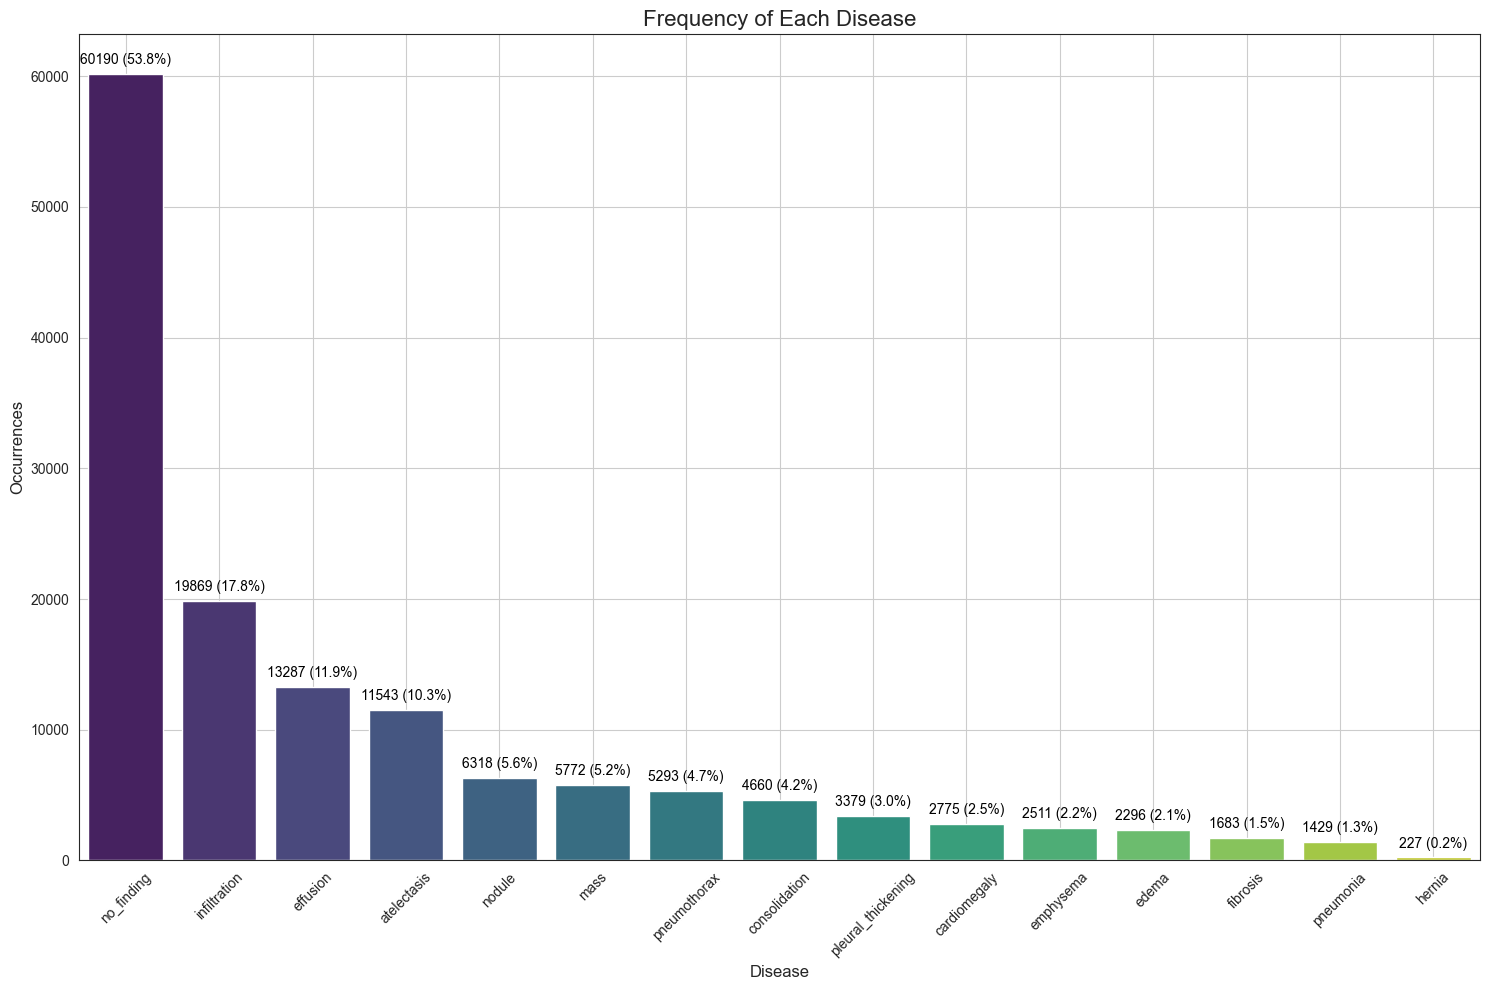

In [ ]:
# creating a barplot for disease count distribution
disease_frequencies = df[disease_list].sum().sort_values(ascending=False)
total_occurrences = len(df)

# Visualize the occurrences as a bar plot
plt.figure(figsize=(15, 10))
ax = sns.barplot(
    x=disease_frequencies.index,
    y=disease_frequencies.values,
    hue=disease_frequencies.index,
    dodge=False,
    palette="viridis",
    legend=False,
)
plt.title("Frequency of Each Disease", fontsize=16)
plt.xlabel("Disease", fontsize=12)
plt.ylabel("Occurrences", fontsize=12)
plt.xticks(rotation=45)
plt.grid()

# Add the frequency labels on top of each bar
for bar in ax.patches:
    # Get the height (frequency) and position of the bar
    bar_height = bar.get_height()
    bar_x_position = bar.get_x() + bar.get_width() / 2
    
    percentage = (bar_height / total_occurrences) * 100

    # Annotate the frequency value on top of the bar
    ax.annotate(
        f'{int(bar_height)} ({percentage:.1f}%)',  # display the height (frequency)
        (bar_x_position, bar_height),  # position the text at the top of the bar
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )
plt.tight_layout()
plt.show()

In [112]:
total_patients = df['patient_id'].nunique()

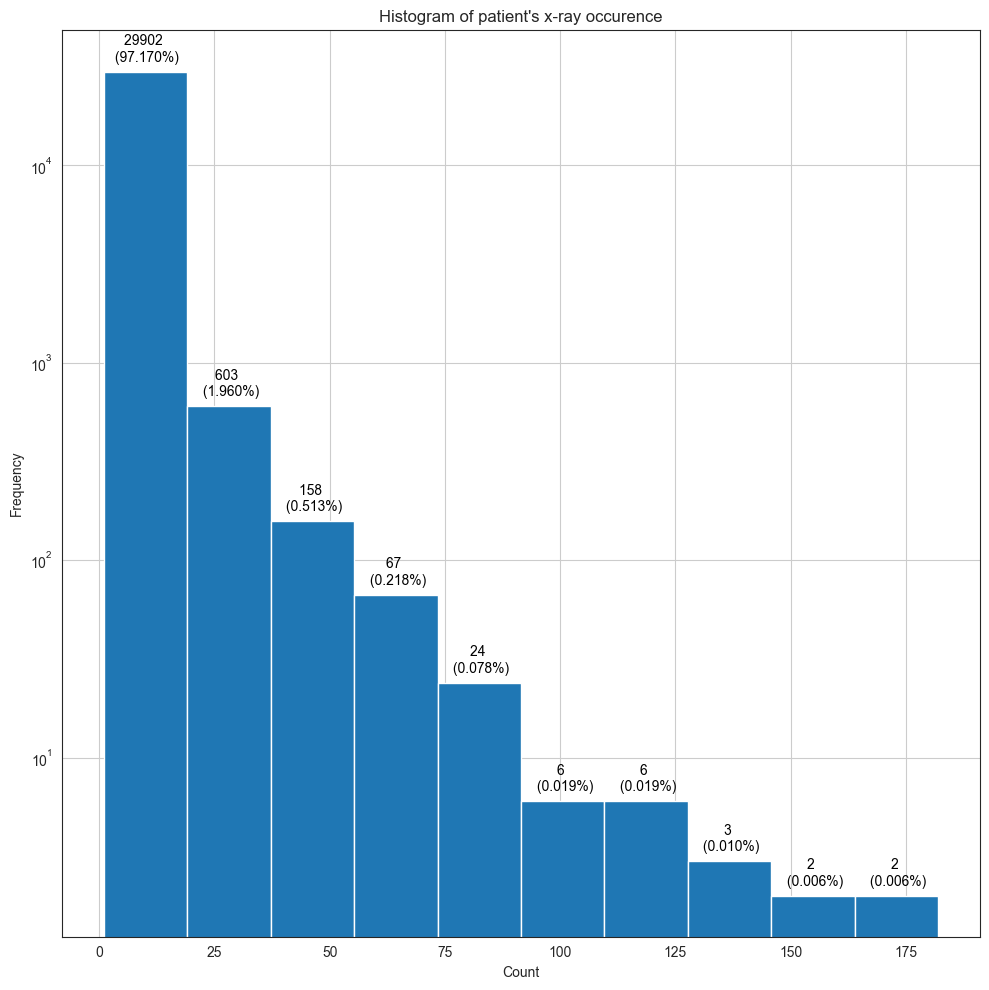

In [116]:
# plotting the histogram of patient's x-ray count
plt.figure(figsize=(10, 10))
ax = df.groupby(by='patient_id').size().reset_index(name='count')['count'].hist()
plt.title("Histogram of patient's x-ray occurence")
plt.ylabel("Frequency")
plt.xlabel("Count")
plt.yscale('log')

# Add the number of patients and the percentage on top of each bar
for rect in ax.patches:
    # Get the height (frequency) and position of the bar
    bar_height = rect.get_height()
    bar_x_position = rect.get_x() + rect.get_width() / 2
    
    # Calculate the percentage
    percentage = (bar_height / total_patients) * 100
    
    # Annotate the number of patients and percentage on top of the bar
    ax.annotate(
        f'{int(bar_height)} \n ({percentage:.3f}%)',  # Display the count and percentage
        (bar_x_position, bar_height),  # Position the text at the top of the bar
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )
    
plt.tight_layout()
plt.show()

In [43]:
# verifying the varience in patient's frequency from the histogram
df.groupby(by='patient_id').size().reset_index(name='count').describe()

,patient_id,count
count,30773.000000,30773.000000
mean,15409.413544,3.635102
std,8892.735548,7.243893
min,1.000000,1.000000
25%,7711.000000,1.000000
50%,15413.000000,1.000000
75%,23111.000000,3.000000
max,30805.000000,182.000000


In [65]:
# looking at the id's with the highest count of x-rays
df.groupby(by='patient_id').size().reset_index(name='count').sort_values(by='count').tail(5)

,patient_id,count
13968,13993,143
12812,12834,154
15503,15530,157
13645,13670,170
9986,10007,182


The range of the number of x-rays per patient ranges from 1 to 182